In [1]:
import geopandas as gpd
from pysal.lib import weights

In [2]:
flood = gpd.read_file('../data/raw/bangladesh_floods_adm4.shp')
flood.to_crs(epsg=4326, inplace=True)
flood

,GEOCODE11,LANDTYPE,Division,District,Upazila,Union,UpzCode,Shape_Leng,Shape_Area,population,pov_rat,pov_score,depr_index,depr_score,vul_index,geometry
0,10040913.0,Land,Barisal,Barguna,Amtali,Amtali,100409.0,53655.059149,4.115672e+07,27008.580630,59.8274,5.98274,-2.47912,9.291279,7.479175,"POLYGON ((90.26177 22.12995, 90.26516 22.12046..."
1,10040915.0,Land,Barisal,Barguna,Amtali,Arpangashia,100409.0,37435.117149,2.304258e+07,11379.207653,59.6481,0.39071,-2.47912,9.291279,2.841423,"MULTIPOLYGON (((90.20036 22.10900, 90.21143 22..."
2,10040915.0,Water,Barisal,Barguna,Amtali,Arpangashia,100409.0,15674.909627,8.410392e+06,1475.601088,3.9071,0.39071,-2.47912,9.291279,2.841423,"POLYGON ((90.19203 22.12160, 90.20036 22.10900..."
3,10040923.0,Land,Barisal,Barguna,Amtali,Atharagashia,100409.0,44889.415013,3.441367e+07,24124.323875,58.8735,5.88735,-2.47912,9.291279,7.421223,"POLYGON ((90.37172 22.19699, 90.36550 22.18771..."
4,10040947.0,Land,Barisal,Barguna,Amtali,Chowra,100409.0,31015.869043,3.231520e+07,24724.627190,57.7630,5.77630,-2.47912,9.291279,7.353258,"POLYGON ((90.29233 22.16603, 90.29250 22.14673..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5466,10092576.0,Land,Barisal,Bhola,Char Fasson,Nilkamal,100925.0,1305.129979,6.754746e+04,23.879813,0.0000,5.76432,-0.96900,8.361869,6.959256,None
5467,10092576.0,Land,Barisal,Bhola,Char Fasson,Nilkamal,100925.0,17392.766030,1.382884e+07,7424.114835,58.3008,5.76432,-0.96900,8.361869,6.959256,"POLYGON ((90.58676 22.18904, 90.59232 22.20041..."
5468,10092576.0,Land,Barisal,Bhola,Char Fasson,Nilkamal,100925.0,27455.022948,2.645161e+07,21833.907897,57.6432,5.76432,-0.96900,8.361869,6.959256,"POLYGON ((90.69391 22.19127, 90.64946 22.19063..."
5469,55772512.0,Land,Rangpur,Panchagarh,Boda,Bara Shashi,557725.0,68319.817428,3.968873e+07,26690.617228,63.3661,6.33661,-2.09737,9.056329,7.590858,"POLYGON ((88.74864 26.29311, 88.74857 26.29289..."


In [3]:
flood.isna().sum()

GEOCODE11      0
LANDTYPE       0
Division       0
District       0
Upazila        0
Union          0
UpzCode        0
Shape_Leng     0
Shape_Area     0
population     0
pov_rat       46
pov_score      0
depr_index     0
depr_score     0
vul_index     67
geometry      25
dtype: int64

There are 25 entries without a geometry. As these are not (easily) added or filled with another geomery, these entries are deleted from the dataframe

In [4]:
df_flood = flood.loc[flood['geometry'].notna()]
df_flood.reset_index(inplace=True)
df_flood_geo_drop = df_flood.drop(columns=['index'])
df_flood_geo_drop

,GEOCODE11,LANDTYPE,Division,District,Upazila,Union,UpzCode,Shape_Leng,Shape_Area,population,pov_rat,pov_score,depr_index,depr_score,vul_index,geometry
0,10040913.0,Land,Barisal,Barguna,Amtali,Amtali,100409.0,53655.059149,4.115672e+07,27008.580630,59.8274,5.98274,-2.47912,9.291279,7.479175,"POLYGON ((90.26177 22.12995, 90.26516 22.12046..."
1,10040915.0,Land,Barisal,Barguna,Amtali,Arpangashia,100409.0,37435.117149,2.304258e+07,11379.207653,59.6481,0.39071,-2.47912,9.291279,2.841423,"MULTIPOLYGON (((90.20036 22.10900, 90.21143 22..."
2,10040915.0,Water,Barisal,Barguna,Amtali,Arpangashia,100409.0,15674.909627,8.410392e+06,1475.601088,3.9071,0.39071,-2.47912,9.291279,2.841423,"POLYGON ((90.19203 22.12160, 90.20036 22.10900..."
3,10040923.0,Land,Barisal,Barguna,Amtali,Atharagashia,100409.0,44889.415013,3.441367e+07,24124.323875,58.8735,5.88735,-2.47912,9.291279,7.421223,"POLYGON ((90.37172 22.19699, 90.36550 22.18771..."
4,10040947.0,Land,Barisal,Barguna,Amtali,Chowra,100409.0,31015.869043,3.231520e+07,24724.627190,57.7630,5.77630,-2.47912,9.291279,7.353258,"POLYGON ((90.29233 22.16603, 90.29250 22.14673..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,30269040.0,Land,Dhaka,Dhaka,Tejgaon,Ward No-40 (Part),302690.0,2741.712612,4.318660e+05,21122.079880,54.5287,5.45287,12.61749,0.000000,1.589502,"POLYGON ((90.38899 23.76457, 90.38998 23.75850..."
5442,10092576.0,Land,Barisal,Bhola,Char Fasson,Nilkamal,100925.0,17392.766030,1.382884e+07,7424.114835,58.3008,5.76432,-0.96900,8.361869,6.959256,"POLYGON ((90.58676 22.18904, 90.59232 22.20041..."
5443,10092576.0,Land,Barisal,Bhola,Char Fasson,Nilkamal,100925.0,27455.022948,2.645161e+07,21833.907897,57.6432,5.76432,-0.96900,8.361869,6.959256,"POLYGON ((90.69391 22.19127, 90.64946 22.19063..."
5444,55772512.0,Land,Rangpur,Panchagarh,Boda,Bara Shashi,557725.0,68319.817428,3.968873e+07,26690.617228,63.3661,6.33661,-2.09737,9.056329,7.590858,"POLYGON ((88.74864 26.29311, 88.74857 26.29289..."


## Fill NaN-values in the vulnerability index
The NaN-values of the vulnerability indexes will be filled based on the average value of the neigbouring areas

In [5]:
matrix = weights.contiguity.Rook.from_dataframe(df_flood_geo_drop)
matrix.neighbors

C:\Users\emily\AppData\Local\Temp\ipykernel_6764\2551415891.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  matrix = weights.contiguity.Rook.from_dataframe(df_flood_geo_drop)
C:\Users\emily\anaconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 7 islands with ids: 1263, 3973, 5426, 5436, 5437, 5438, 5439.
  warnings.warn(message)


{0: [385, 1, 4, 6, 375, 9, 382],
 1: [0, 2, 19, 5095, 9, 375],
 2: [1, 10, 20, 5097],
 3: [405, 6, 344, 8, 394, 364],
 4: [0, 5, 6, 8, 9, 10, 15, 20],
 5: [4, 405, 8, 399, 15],
 6: [0, 3, 4, 8, 364, 382],
 7: [384, 5101, 5103],
 8: [3, 4, 5, 6, 405],
 9: [0, 1, 10, 4],
 10: [9, 2, 4, 20],
 11: [33, 36, 37, 292, 12, 14],
 12: [292, 427, 422, 296, 11, 13, 14],
 13: [16, 50, 424, 42, 427, 12, 14],
 14: [16, 37, 11, 12, 13],
 15: [19, 4, 5, 20, 392, 25, 399],
 16: [37, 41, 42, 13, 14, 17, 18, 21, 24],
 17: [16, 41, 42],
 18: [16, 19, 21, 24, 26, 30],
 19: [1, 15, 18, 20, 24, 25, 26, 30],
 20: [2, 19, 4, 5097, 10, 15],
 21: [16, 18, 22, 41, 26, 28],
 22: [42, 29, 44, 21],
 23: [24, 25, 35, 37],
 24: [16, 18, 19, 37, 23, 25, 30],
 25: [19, 35, 23, 392, 24, 15],
 26: [18, 19, 21, 5097, 27, 28],
 27: [5096, 5097, 26, 5099],
 28: [26, 29, 21],
 29: [49, 52, 22, 28, 44],
 30: [24, 18, 19],
 31: [32, 34, 36, 388, 38, 391, 295, 297],
 32: [306, 293, 391, 297, 77, 78, 31],
 33: [34, 35, 36, 37, 390

In [6]:
empty_vul = df_flood_geo_drop[df_flood_geo_drop['vul_index'].isna()]
empty_vul_list = empty_vul.index.values.tolist()

In [7]:
def fill_vul_nans(dataframe, index_list, matrix):
    """ For each entry that do not have a vulnerability index, calculate the average vulnerability of its neighbours. Return the dictionary that maps each index to its average """
    dict = {}

    for i in index_list:
        neigh = [i]
        neigh.extend(matrix[i])

        df = dataframe.loc[neigh]
        mean = df.loc[:, 'vul_index'].mean()
        dict[i]=mean
     
    return dict

In [8]:
fill_dict = fill_vul_nans(df_flood_geo_drop, empty_vul_list, matrix)
fill_dict

{68: 5.671722686,
 69: 4.3580289945,
 102: 6.035504981,
 146: 5.384139202333333,
 147: 5.944770223000001,
 161: 3.7904485166,
 162: 3.488642297666667,
 172: 6.0227342082222215,
 194: 6.7839588305000005,
 195: 6.762328364000001,
 211: 7.724220255333333,
 212: 8.430190717333334,
 215: 7.3621648424999995,
 216: 9.148291081,
 221: 6.357059936666666,
 222: 2.169275587,
 226: 5.0638281130000005,
 227: 4.3659659555,
 251: 6.0204324982,
 252: 4.955979718000001,
 376: 5.854648716,
 377: 6.304896389666666,
 785: 2.901609728,
 786: 2.6034830615,
 787: 3.425231411,
 788: 3.953550027,
 846: 3.4488491007500004,
 847: 3.953550027,
 849: 3.441710735,
 850: 3.953550027,
 851: 3.3997215080000003,
 852: 3.6150840090000003,
 1261: 6.5966111145,
 1262: 6.559262383,
 1264: 6.559262383,
 1265: 6.559262383,
 1269: 6.559262383,
 1270: 6.559262383,
 1314: 5.950715794250001,
 1315: 4.903425172,
 1469: 6.040495736166666,
 1470: 5.517532468333333,
 2673: 6.350244879166667,
 2674: 5.133776692666666,
 2692: 7.521768

In [9]:
fill_list  = list(fill_dict.keys())

# Fill the empty vulnerability index using the dictionary
for index in fill_list:
    df_flood_geo_drop.at[index,'vul_index'] = fill_dict[index]

The last four entries dont have any neighbours. Plot them to see where they are, to see how the values should be filled; average value of the country or, if it is located next to a body of water, on the higher end.

In [10]:
for row in range(len(df_flood_geo_drop)):
    if df_flood_geo_drop.loc[row, 'vul_index'] > 0:
        df_flood_geo_drop.at[row, 'vul_bin'] = 1
    else:
        df_flood_geo_drop.at[row, 'vul_bin'] = 0

In [11]:
df_flood_geo_drop['vul_bin'].value_counts()

vul_bin
1.0    5442
0.0       4
Name: count, dtype: int64

<Axes: >

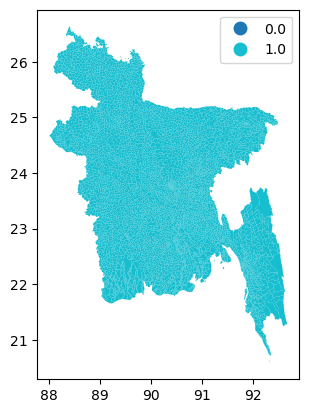

In [12]:
df_flood_geo_drop.plot('vul_bin', categorical=True, legend=True)

Comparing this map to Google Maps, the four areas are not really part of Bangladesh, and therefor will be deleted out of the dataframe

In [13]:
df_flood_filled = df_flood_geo_drop[df_flood_geo_drop['vul_index'].notna()]
df_flood_filled.reset_index(inplace=True)
df_flood_filled_drop = df_flood_filled.drop(columns=['index', 'vul_bin'])

In [14]:
df_flood_filled_drop.isna().sum()

GEOCODE11      0
LANDTYPE       0
Division       0
District       0
Upazila        0
Union          0
UpzCode        0
Shape_Leng     0
Shape_Area     0
population     0
pov_rat       30
pov_score      0
depr_index     0
depr_score     0
vul_index      0
geometry       0
dtype: int64

## Categorize the vulnerability index

<Axes: >

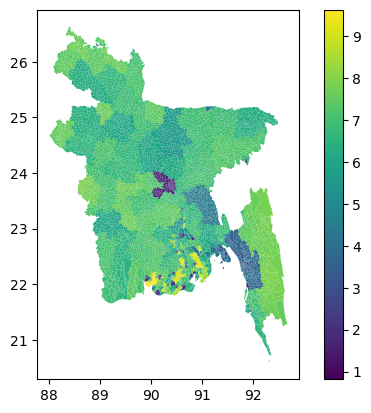

In [15]:
df_flood_filled_drop.plot(column='vul_index', legend=True)

In [16]:
def categories(dataframe, N):
    """ Categorize the vulnerability index based on the specified amount of categories """
    values = []
    step = 10/N
    for i in range((N+1)):
        values.append(i*step)
    
    
    df = dataframe.copy()
    df.reset_index(inplace=True)
    
    for row in range(len(df)):
        for i in range(N):
            if (df.loc[row,'vul_index'] > values[i]) & (df.loc[row,'vul_index'] <= values[i+1]):
                df.at[row, 'vul_cluster'] = i
    
    return df  

In [17]:
df_flood_categorized = categories(df_flood_filled_drop, 4)
df_flood_categorized

,index,GEOCODE11,LANDTYPE,Division,District,Upazila,Union,UpzCode,Shape_Leng,Shape_Area,population,pov_rat,pov_score,depr_index,depr_score,vul_index,geometry,vul_cluster
0,0,10040913.0,Land,Barisal,Barguna,Amtali,Amtali,100409.0,53655.059149,4.115672e+07,27008.580630,59.8274,5.98274,-2.47912,9.291279,7.479175,"POLYGON ((90.26177 22.12995, 90.26516 22.12046...",2.0
1,1,10040915.0,Land,Barisal,Barguna,Amtali,Arpangashia,100409.0,37435.117149,2.304258e+07,11379.207653,59.6481,0.39071,-2.47912,9.291279,2.841423,"MULTIPOLYGON (((90.20036 22.10900, 90.21143 22...",1.0
2,2,10040915.0,Water,Barisal,Barguna,Amtali,Arpangashia,100409.0,15674.909627,8.410392e+06,1475.601088,3.9071,0.39071,-2.47912,9.291279,2.841423,"POLYGON ((90.19203 22.12160, 90.20036 22.10900...",1.0
3,3,10040923.0,Land,Barisal,Barguna,Amtali,Atharagashia,100409.0,44889.415013,3.441367e+07,24124.323875,58.8735,5.88735,-2.47912,9.291279,7.421223,"POLYGON ((90.37172 22.19699, 90.36550 22.18771...",2.0
4,4,10040947.0,Land,Barisal,Barguna,Amtali,Chowra,100409.0,31015.869043,3.231520e+07,24724.627190,57.7630,5.77630,-2.47912,9.291279,7.353258,"POLYGON ((90.29233 22.16603, 90.29250 22.14673...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5437,30269040.0,Land,Dhaka,Dhaka,Tejgaon,Ward No-40 (Part),302690.0,2741.712612,4.318660e+05,21122.079880,54.5287,5.45287,12.61749,0.000000,1.589502,"POLYGON ((90.38899 23.76457, 90.38998 23.75850...",0.0
5438,5438,10092576.0,Land,Barisal,Bhola,Char Fasson,Nilkamal,100925.0,17392.766030,1.382884e+07,7424.114835,58.3008,5.76432,-0.96900,8.361869,6.959256,"POLYGON ((90.58676 22.18904, 90.59232 22.20041...",2.0
5439,5439,10092576.0,Land,Barisal,Bhola,Char Fasson,Nilkamal,100925.0,27455.022948,2.645161e+07,21833.907897,57.6432,5.76432,-0.96900,8.361869,6.959256,"POLYGON ((90.69391 22.19127, 90.64946 22.19063...",2.0
5440,5440,55772512.0,Land,Rangpur,Panchagarh,Boda,Bara Shashi,557725.0,68319.817428,3.968873e+07,26690.617228,63.3661,6.33661,-2.09737,9.056329,7.590858,"POLYGON ((88.74864 26.29311, 88.74857 26.29289...",3.0


<Axes: >

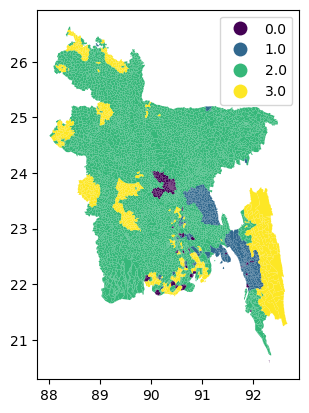

In [18]:
df_flood_categorized.plot('vul_cluster', categorical=True, legend=True, cmap='viridis')

In [19]:
df_vul_shapes = df_flood_categorized.dissolve(by='vul_cluster')
df_vul_shapes

,geometry,index,GEOCODE11,LANDTYPE,Division,District,Upazila,Union,UpzCode,Shape_Leng,Shape_Area,population,pov_rat,pov_score,depr_index,depr_score,vul_index
vul_cluster,,,,,,,,,,,,,,,,,
0.0,"MULTIPOLYGON (((90.08284 21.85028, 90.08541 21...",39,10048511.0,Land,Barisal,Barguna,Patharghata,Char Duanti,100485.0,30318.126962,3.619883e+07,29196.269255,61.8228,0.02623,-2.47912,9.291279,2.328521
1.0,"MULTIPOLYGON (((90.18406 21.89579, 90.17897 21...",1,10040915.0,Land,Barisal,Barguna,Amtali,Arpangashia,100409.0,37435.117149,2.304258e+07,11379.207653,59.6481,0.39071,-2.47912,9.291279,2.841423
2.0,"MULTIPOLYGON (((88.62367 24.31560, 88.60667 24...",0,10040913.0,Land,Barisal,Barguna,Amtali,Amtali,100409.0,53655.059149,4.115672e+07,27008.580630,59.8274,5.98274,-2.47912,9.291279,7.479175
3.0,"MULTIPOLYGON (((88.58003 23.60306, 88.58527 23...",7,10040979.0,Water,Barisal,Barguna,Amtali,Karaibaria,100409.0,733.432802,1.535757e+04,0.000000,52.7132,6.20958,-2.47912,9.291279,7.615440


<Axes: >

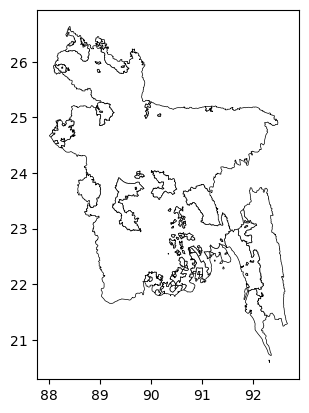

In [20]:
df_vul_shapes.plot(linewidth=0.5, facecolor='white', edgecolor='black')

## Write polygons out to shapefiles

In [21]:
shapes_series = df_vul_shapes['geometry']
shapes_df = gpd.GeoDataFrame(geometry=gpd.GeoSeries(shapes_series))

In [22]:
for i in range(len(shapes_df)):
    df = shapes_df.loc[[i]]
    df.to_file(f'../data/semi-processed/shape_cat_{i}.shp', driver='ESRI Shapefile')

C:\Users\emily\AppData\Local\Temp\ipykernel_6764\1064114259.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(f'../data/semi-processed/shape_cat_{i}.shp', driver='ESRI Shapefile')
C:\Users\emily\AppData\Local\Temp\ipykernel_6764\1064114259.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(f'../data/semi-processed/shape_cat_{i}.shp', driver='ESRI Shapefile')
C:\Users\emily\AppData\Local\Temp\ipykernel_6764\1064114259.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(f'../data/semi-processed/shape_cat_{i}.shp', driver='ESRI Shapefile')
C:\Users\emily\AppData\Local\Temp\ipykernel_6764\1064114259.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(f'../data/semi-processed/shape_cat_{i}.shp', driver='ESRI Shapefile')
